In [18]:
import math
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Stock Price Prediction

In [19]:
df = pd.read_excel('FORD_monthly.xlsx')
df = df[['date','AvgRate','AvgCompound','sales','PercPos','Close','Mkt-RF','SMB','HML']]
df = df.dropna(how='any')
df = df.set_index('date')

#Normilize 
scaler = MinMaxScaler(feature_range=(0,1))
df[['AvgRate','Close','sales']] = scaler.fit_transform(df[['AvgRate','Close','sales']])

#Shift Data Frame
projection = 4
df['prediction'] = df[['Close']].shift(-projection)
df_1 = df[:-4]
X = df_1.drop(columns=['prediction'],axis=1)
y = df_1['prediction']

#Train Test Split 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

x_test2 = df.drop(columns=['prediction'])
y_test2 = df['prediction']

In [3]:
#Neural Networks Regression Stock Price

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(1000, input_dim=8,activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs= 500)

Epoch 1/500
5/5 [==============================] - 1s 46ms/step - loss: 0.2864 - mae: 0.4798 - val_loss: 0.0444 - val_mae: 0.1621
Epoch 2/500
5/5 [==============================] - 0s 14ms/step - loss: 0.0558 - mae: 0.1850 - val_loss: 0.0446 - val_mae: 0.1700
Epoch 3/500
5/5 [==============================] - 0s 17ms/step - loss: 0.0415 - mae: 0.1642 - val_loss: 0.0366 - val_mae: 0.1434
Epoch 4/500
5/5 [==============================] - 0s 15ms/step - loss: 0.0326 - mae: 0.1470 - val_loss: 0.0439 - val_mae: 0.1800
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0285 - mae: 0.1347 - val_loss: 0.0261 - val_mae: 0.1233
Epoch 6/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0199 - mae: 0.1088 - val_loss: 0.0258 - val_mae: 0.1350
Epoch 7/500
5/5 [==============================] - 0s 14ms/step - loss: 0.0160 - mae: 0.0966 - val_loss: 0.0196 - val_mae: 0.1134
Epoch 8/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0133 - mae: 0.09

1/1 [==============================] - 0s 32ms/step - loss: 0.0123 - mae: 0.0892
Mean squared error : 0.012264654971659184
Mean absolute error: 0.08916889131069183


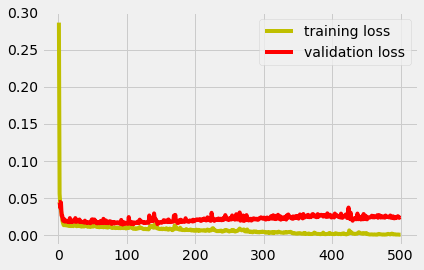

In [4]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'y',label='training loss')
plt.plot(epochs, val_loss,'r',label='validation loss')
plt.legend()

mse_neural, mae_neural = model.evaluate(x_test,y_test)

print('Mean squared error :',mse_neural)
print('Mean absolute error:',mae_neural)

y_pred_neu = model.predict(x_test)
r2_neu = r2_score(y_test,y_pred_neu)

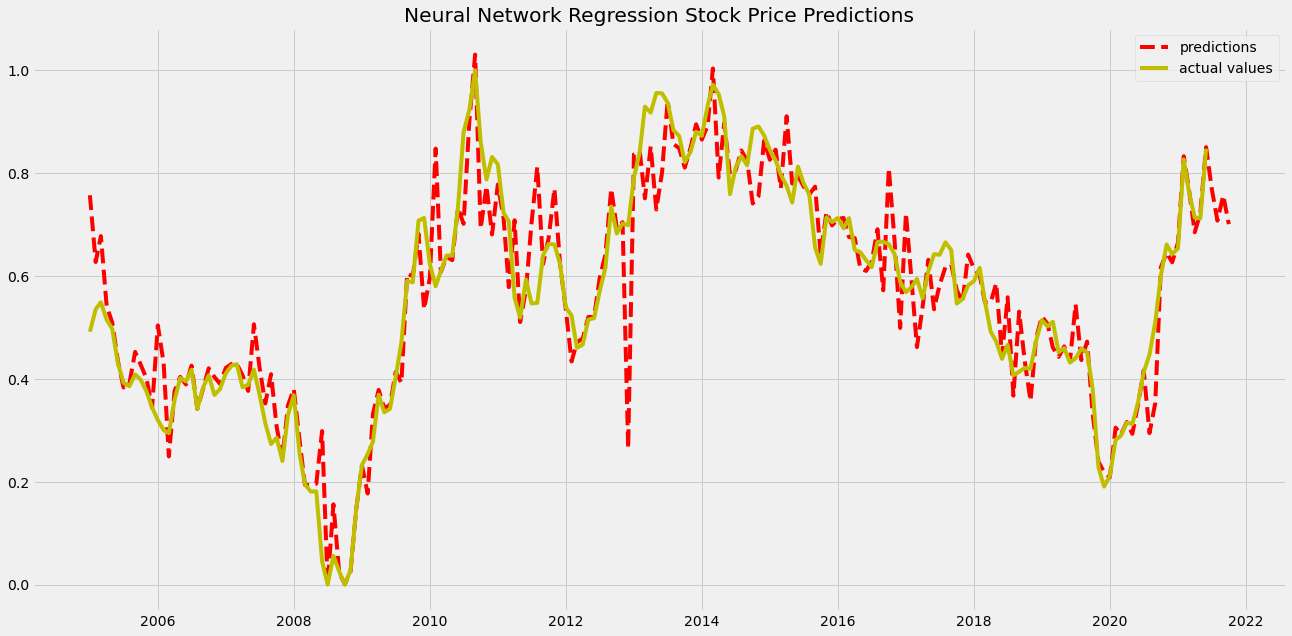

In [5]:
#Neural networks stock price predicitons
y_pred_neu2 = model.predict(x_test2)
neu_pred_data = pd.DataFrame(y_pred_neu2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Neural Network Regression Stock Price Predictions')
plt.plot(neu_pred_data[0],'r--',label='predictions')
plt.plot(neu_pred_data['prediction'],'y',label='actual values')
plt.legend()

Mean squared error from linear reg: 0.018006392142376426
Mean absolute error 0.1117002633476712


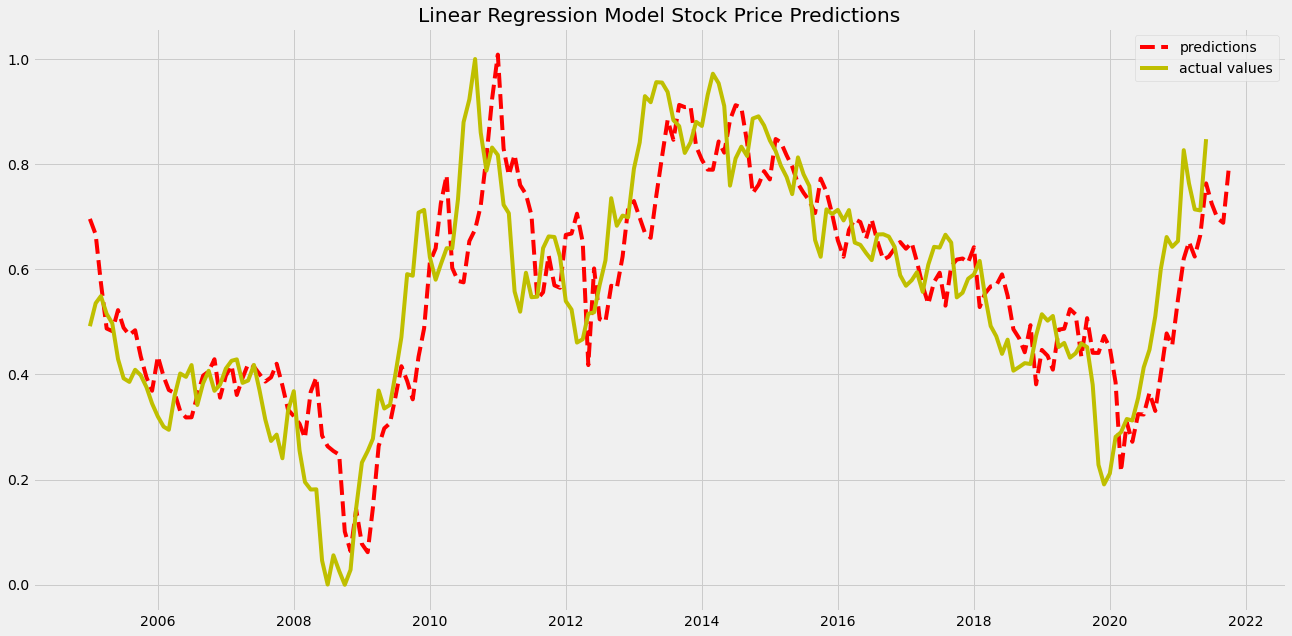

In [6]:
#Linear Model Regression
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)
print('Mean squared error from linear reg:',mse_lr)
print('Mean absolute error',mae_lr)

y_pred_lr2 = lr_model.predict(x_test2)
lr_pred_data = pd.DataFrame(y_pred_lr2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Linear Regression Model Stock Price Predictions')
plt.plot(lr_pred_data[0],'r--',label='predictions')
plt.plot(lr_pred_data['prediction'],'y',label='actual values')
plt.legend()


Mean squared error from dt: 0.03485972491802836
Mean absolute error dt: 0.13942039233650122
Close          0.759648
sales          0.064151
AvgRate        0.049921
SMB            0.046318
HML            0.035611
PercPos        0.031229
AvgCompound    0.012144
Mkt-RF         0.000978
dtype: float64


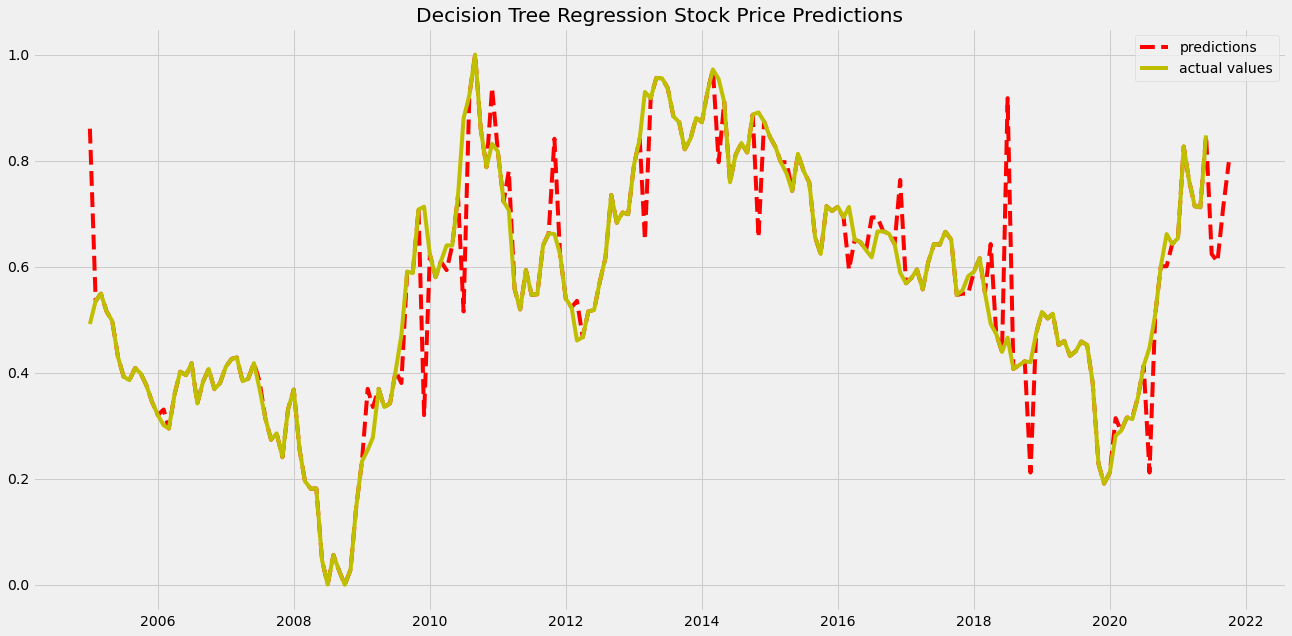

In [7]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
mse_dt = mean_squared_error(y_test,y_pred_tree)
mae_dt = mean_absolute_error(y_test,y_pred_tree)
r2_dt = r2_score(y_test,y_pred_tree)

print('Mean squared error from dt:',mse_dt)
print('Mean absolute error dt:',mae_dt)

y_pred_dt2 = tree.predict(x_test2)
dt_pred_data = pd.DataFrame(y_pred_dt2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Decision Tree Regression Stock Price Predictions')
plt.plot(dt_pred_data[0],'r--',label='predictions')
plt.plot(dt_pred_data['prediction'],'y',label='actual values')
plt.legend()

#Feature Ranking
print(pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False))


Mean squared error from dt: 0.012264656017166609
Mean absolute error dt: 0.08916888476173541
Close          0.766342
sales          0.059833
HML            0.033188
Mkt-RF         0.032825
SMB            0.032197
AvgRate        0.027539
AvgCompound    0.025412
PercPos        0.022664
dtype: float64


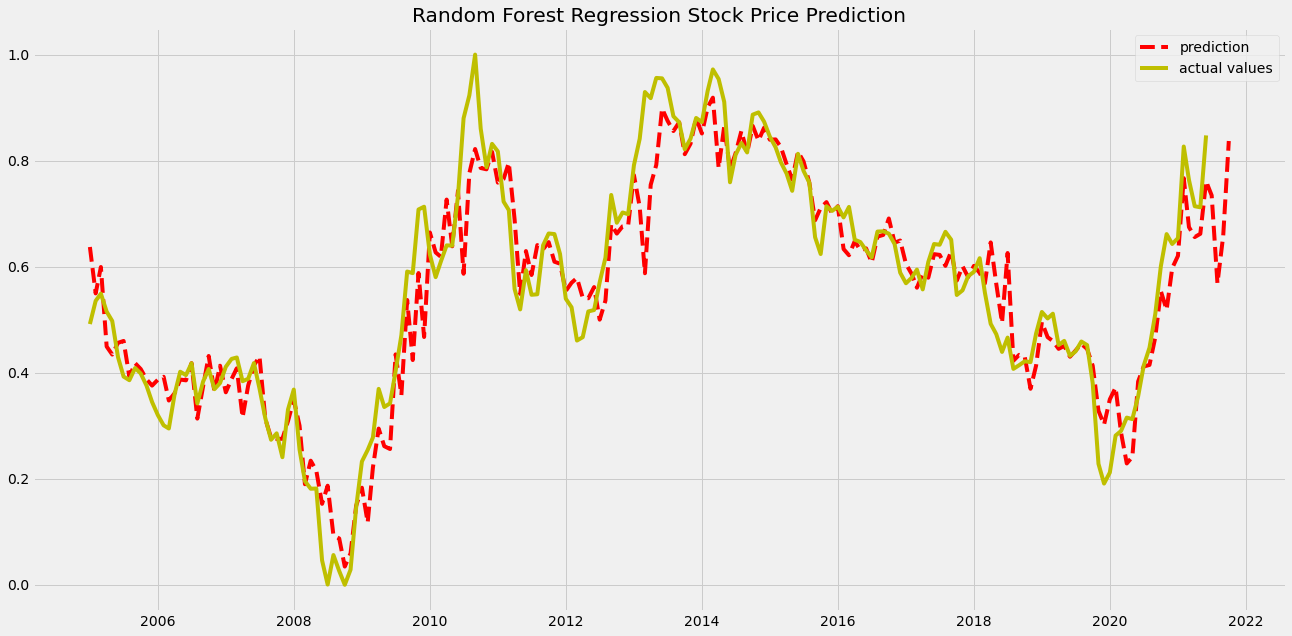

In [8]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators=10, random_state=30)
rfmodel.fit(x_train,y_train)

y_pred_rf = model.predict(x_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print('Mean squared error from dt:',mse_rf)
print('Mean absolute error dt:',mae_rf)

y_pred_rf2 = rfmodel.predict(x_test2)
rf_pred_data = pd.DataFrame(y_pred_rf2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Random Forest Regression Stock Price Prediction')
plt.plot(rf_pred_data[0],'r--',label='prediction')
plt.plot(rf_pred_data['prediction'],'y',label='actual values')
plt.legend()

print(pd.Series(rfmodel.feature_importances_, index=X.columns).sort_values(ascending=False))

In [9]:
print('Neural Networks mse,mae,r2:  ',mse_neural,mae_neural,r2_neu)
print('Linear Regression mse,mae,r2:',mse_lr,mae_lr,r2_lr)
print('Decison tree mse,mae,r2',mse_dt,mae_dt,r2_dt)
print('Random forests mse,mae,r2',mse_rf,mae_rf,r2_rf)

Neural Networks mse,mae,r2:   0.012264654971659184 0.08916889131069183 0.694853450453461
Linear Regression mse,mae,r2: 0.018006392142376426 0.1117002633476712 0.5519981624973904
Decison tree mse,mae,r2 0.03485972491802836 0.13942039233650122 0.13268462140405757
Random forests mse,mae,r2 0.012264656017166609 0.08916888476173541 0.694853450453461


# Sales Predictions

In [10]:
df = pd.read_excel('FORD_monthly.xlsx')
df = df[['date','AvgRate','AvgCompound','sales','PercPos']]
df = df.dropna(how='any')
df = df.set_index('date')

#Normilize 
scaler = MinMaxScaler(feature_range=(0,1))
df[['AvgRate','sales']] = scaler.fit_transform(df[['AvgRate','sales']])

#Shift Data Frame
projection = 4
df['prediction'] = df[['sales']].shift(-projection)
df_1 = df[:-4]
X = df_1.drop(columns=['prediction'],axis=1)
y = df_1['prediction']

#Train Test Split 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)


x_test2 =  df.drop(columns=['prediction'])[:-1]
y_test2 = df['prediction'][:-1]

In [11]:
#Neural Networks Regression Sales

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(1000, input_dim=4,activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs= 200)

Epoch 1/200
5/5 [==============================] - 1s 77ms/step - loss: 0.0991 - mae: 0.2642 - val_loss: 0.0480 - val_mae: 0.1907
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0334 - mae: 0.1457 - val_loss: 0.0334 - val_mae: 0.1611
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0227 - mae: 0.1262 - val_loss: 0.0139 - val_mae: 0.0913
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0167 - mae: 0.1008 - val_loss: 0.0168 - val_mae: 0.1102
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0161 - mae: 0.1042 - val_loss: 0.0108 - val_mae: 0.0842
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0129 - mae: 0.0924 - val_loss: 0.0109 - val_mae: 0.0829
Epoch 7/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0122 - mae: 0.0883 - val_loss: 0.0118 - val_mae: 0.0862
Epoch 8/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0109 - mae: 0.08

1/1 [==============================] - 0s 17ms/step - loss: 0.0190 - mae: 0.0999
Mean squared error : 0.01896394044160843
Mean absolute error: 0.0999087318778038


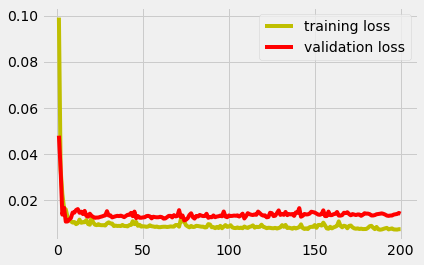

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'y',label='training loss')
plt.plot(epochs, val_loss,'r',label='validation loss')
plt.legend()

mse_neural, mae_neural = model.evaluate(x_test,y_test)

print('Mean squared error :',mse_neural)
print('Mean absolute error:',mae_neural)

y_pred_neu = model.predict(x_test)
r2_neu = r2_score(y_test,y_pred_neu)

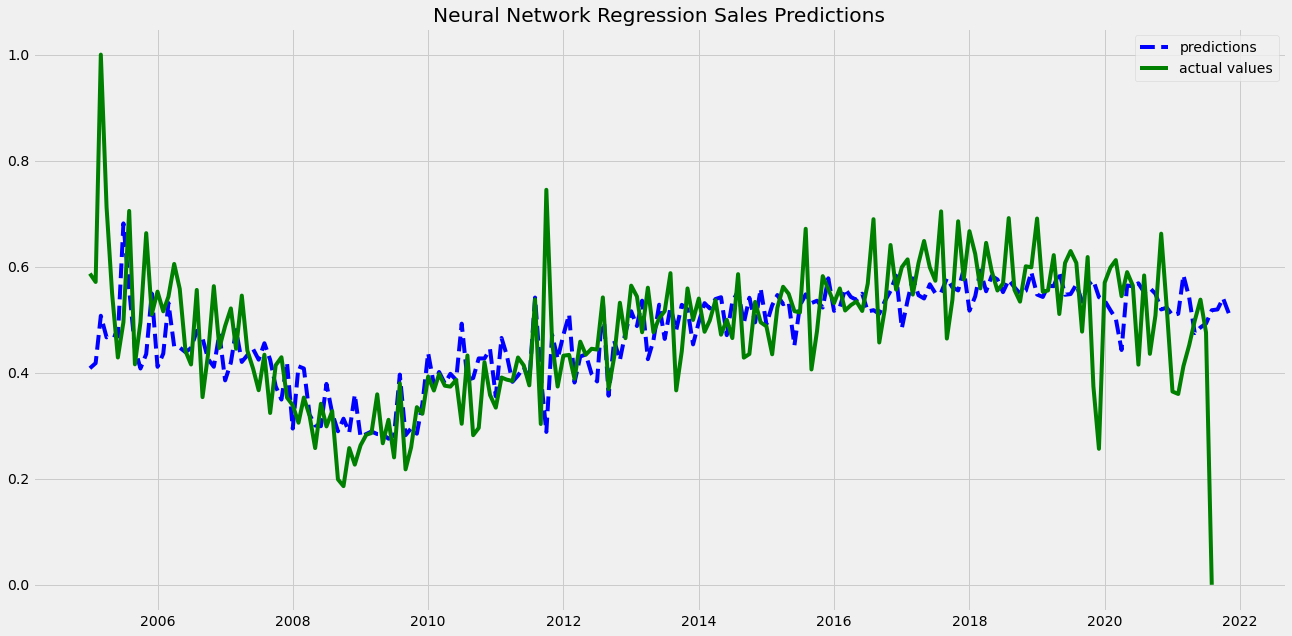

In [13]:

y_pred_neu2 = model.predict(x_test2)
neu_pred_data = pd.DataFrame(y_pred_neu2, index= y_test2.index).join(y_test2).sort_index()


plt.figure(figsize=(20,10))
plt.title('Neural Network Regression Sales Predictions')
plt.plot(neu_pred_data[0],'b--',label='predictions')
plt.plot(neu_pred_data['prediction'],'g',label='actual values')
plt.legend()

Mean squared error from linear reg: 0.017268823817340496
Mean absolute error 0.09688724871838694


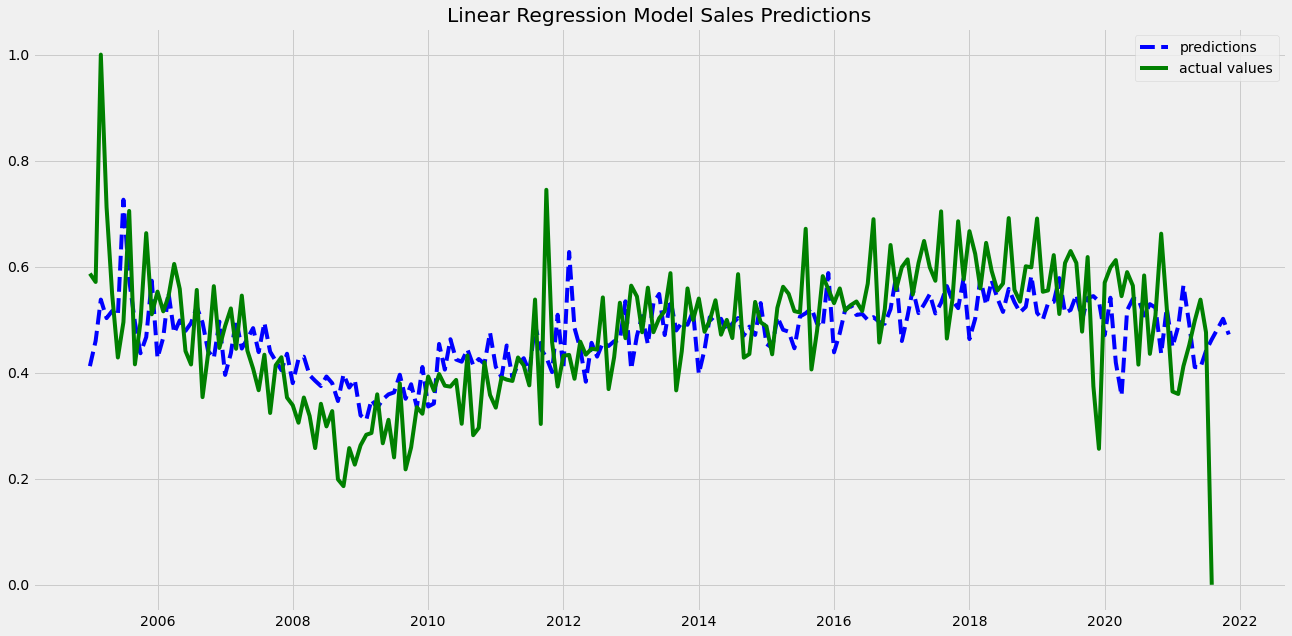

In [14]:
#Linear Model Regression
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)
print('Mean squared error from linear reg:',mse_lr)
print('Mean absolute error',mae_lr)

y_pred_lr2 = lr_model.predict(x_test2)
lr_pred_data = pd.DataFrame(y_pred_lr2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Linear Regression Model Sales Predictions')
plt.plot(lr_pred_data[0],'b--',label='predictions')
plt.plot(lr_pred_data['prediction'],'g',label='actual values')
plt.legend()

Mean squared error from dt: 0.022812235546529763
Mean absolute error dt: 0.10292292134536331


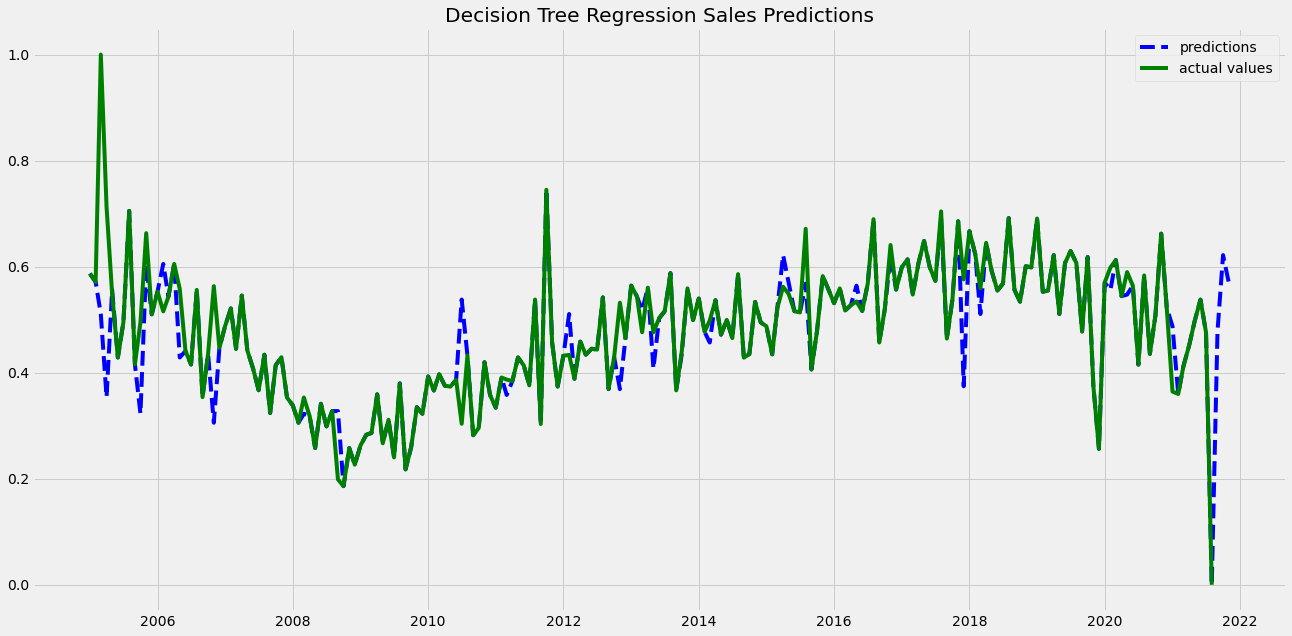

In [15]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
mse_dt = mean_squared_error(y_test,y_pred_tree)
mae_dt = mean_absolute_error(y_test,y_pred_tree)
r2_dt = r2_score(y_test,y_pred_tree)

print('Mean squared error from dt:',mse_dt)
print('Mean absolute error dt:',mae_dt)

y_pred_dt2 = tree.predict(x_test2)
dt_pred_data = pd.DataFrame(y_pred_dt2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Decision Tree Regression Sales Predictions')
plt.plot(dt_pred_data[0],'b--',label='predictions')
plt.plot(dt_pred_data['prediction'],'g',label='actual values')
plt.legend()


Mean squared error from dt: 0.01896394027976423
Mean absolute error dt: 0.09990873552400596
sales          0.516323
AvgRate        0.264024
PercPos        0.116858
AvgCompound    0.102795
dtype: float64


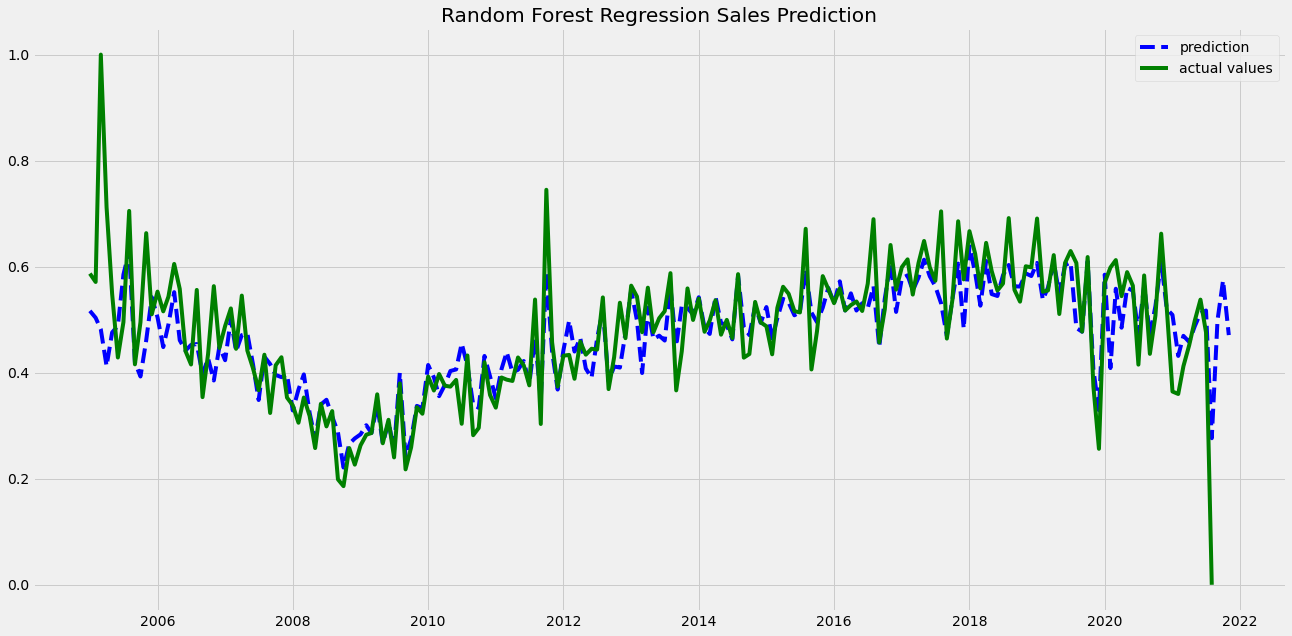

In [16]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators=10, random_state=30)
rfmodel.fit(x_train,y_train)

y_pred_rf = model.predict(x_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print('Mean squared error from dt:',mse_rf)
print('Mean absolute error dt:',mae_rf)

y_pred_rf2 = rfmodel.predict(x_test2)
rf_pred_data = pd.DataFrame(y_pred_rf2, index= y_test2.index).join(y_test2).sort_index()

print(pd.Series(rfmodel.feature_importances_, index=X.columns).sort_values(ascending=False))


plt.figure(figsize=(20,10))
plt.title('Random Forest Regression Sales Prediction')
plt.plot(rf_pred_data[0],'b--',label='prediction')
plt.plot(rf_pred_data['prediction'],'g',label='actual values')
plt.legend()

In [17]:
print('Neural Networks mse,mae,r2:  ',mse_neural,mae_neural,r2_neu)
print('Linear Regression mse,mae,r2:',mse_lr,mae_lr,r2_lr)
print('Decison tree mse,mae,r2',mse_dt,mae_dt,r2_dt)
print('Random forests mse,mae,r2',mse_rf,mae_rf,r2_rf)

Neural Networks mse,mae,r2:   0.01896394044160843 0.0999087318778038 0.07854594172340457
Linear Regression mse,mae,r2: 0.017268823817340496 0.09688724871838694 0.16091131097203826
Decison tree mse,mae,r2 0.022812235546529763 0.10292292134536331 -0.10844195418299396
Random forests mse,mae,r2 0.01896394027976423 0.09990873552400596 0.07854594172340457
